## Product Class

In [ ]:
class Product():
    def __init__(self, name, space, priority):
        self.name = name
        self.space = space
        self.priority = priority

In [2]:
p1 = Product('Item 1', 0.751, 1)

p1.name, p1.space, p1.priority

In [3]:
products_list = []
products_list.append(Product('Item 1', 0.751, 1))
products_list.append(Product('Item 2', 0.0000899, 3))
products_list.append(Product('Item 3', 0.400, 5))
products_list.append(Product('Item 4', 0.290, 5))
products_list.append(Product('Item 5', 0.200, 4))
products_list.append(Product('Item 6', 0.00350, 4))
products_list.append(Product('Item 7', 0.496, 1))
products_list.append(Product('Item 8', 0.0424, 2))
products_list.append(Product('Item 9', 0.0319, 1))
products_list.append(Product('Item 10', 0.635, 2))
products_list.append(Product('Item 11', 0.870, 3))
products_list.append(Product('Item 12', 0.498, 3))
products_list.append(Product('Item 13', 0.0544, 1))
products_list.append(Product('Item 14', 0.527, 5))
products_list.append(Product('Item 15', 0.353, 2))

In [4]:
for product in products_list:
    print(product.name, ' - ', product.space, ' - ', product.priority)

Item 1  -  0.751  -  1
Item 2  -  8.99e-05  -  3
Item 3  -  0.4  -  5
Item 4  -  0.29  -  5
Item 5  -  0.2  -  4
Item 6  -  0.0035  -  4
Item 7  -  0.496  -  1
Item 8  -  0.0424  -  2
Item 9  -  0.0319  -  1
Item 10  -  0.635  -  2
Item 11  -  0.87  -  3
Item 12  -  0.498  -  3
Item 13  -  0.0544  -  1
Item 14  -  0.527  -  5
Item 15  -  0.353  -  2


# Individual Class

In [5]:
from random import random

In [6]:
class Individual():
    def __init__(self, spaces, priorities, space_limit, generation=0):
        self.spaces = spaces
        self.priorities = priorities
        self.space_limit = space_limit
        self.score_evaluation = 0
        self.used_space = 0
        self.generation = generation
        self.chromosome = []
        
        for i in range(len(spaces)):  ## we have range(len(spaces)) = 15
            if random() < 0.5:
                self.chromosome.append('0')
            else:
                self.chromosome.append('1')
                
                
    def fitness(self):
        score = 0
        sum_spaces = 0
        
        for i in range(len(self.chromosome)):  #len(chromosome) = 15
            if self.chromosome[i] == '1':
                score += self.priorities[i]
                sum_spaces += self.spaces[i]
                
        if sum_spaces > self.space_limit:
            score = 1            # asssign low score if exceed space limit
            
        self.score_evaluation = score
        self.used_space = sum_spaces
        
    def crossover(self,other_individual):
        cutoff = round(random() * len(self.chromosome)) #to ensure cutoff between 0-15
        #print('Cutoff: ', cutoff)
        
        child1 = other_individual.chromosome[0:cutoff] + self.chromosome[cutoff::]
        child2 = self.chromosome[0:cutoff] + other_individual.chromosome[cutoff::]
        
#         print('Child 1: ', child1)
#         print('Child 2: ',child2)
        
        children = [Individual(self.spaces, self.priorities, self.space_limit, self.generation+1),
                   Individual(self.spaces, self.priorities, self.space_limit, self.generation+1)]
        
        children[0].chromosome = child1
        children[1].chromosome = child2
        return children
    
    
    def mutation(self, rate):
        #print('Before mutation: ', self.chromosome)
        mutation_number = 0
        for i in range(len(self.chromosome)): #accesing each gene in a chromosome
            if random() < rate: 
                mutation_number += 1
                #print('Mutation occuring...')
                if self.chromosome[i] == '1':
                    self.chromosome[i] = '0'          
                else:
                    self. chromosome[i] = '1'
        #print('Number of mutations occurred: ', mutation_number)           
        #print('After mutation: ', self.chromosome)
        return self

# Genetic Algorithm Class

In [7]:
class GeneticAlgorithm():
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = []
        self.generation = 0
        self.best_solution = None
        self.list_of_solutions_score = []
        self.list_of_solutions_space = []
        
    def initialize_population(self, spaces, priorities, space_limit):
        for i in range(self.population_size):
            self.population.append(Individual(spaces, priorities, space_limit)) #creating individuals
            
        self.best_solution = self.population[0] #initialize
        
    def order_population(self):
        self.population = sorted(self.population, key=lambda population: population.score_evaluation, reverse=True)
        
    def best_individual(self, individual):
        if individual.score_evaluation > self.best_solution.score_evaluation:
            self.best_solution = individual
            
    def sum_evaluations(self):
        sum = 0
        for individual in self.population:
            sum += individual.score_evaluation
        return sum
    
    def select_parent(self, sum_evaluation):
        parent = -1 #random initialization for variable
        random_value = random() * sum_evaluation
        sum = 0
        i = 0
        #print('Random value: ', random_value)
        while i < (len(self.population)) and sum < random_value:
            sum += self.population[i].score_evaluation
            #print('i: ', i, ' - ', 'Sum:', sum)
            parent += 1
            i += 1
            
#         print('Chromosome: ', ga.population[parent].chromosome)
#         print('Used Space: ', ga.population[parent].used_space)
#         print('Score: ', ga.population[parent].score_evaluation)
        return parent


    def visualize_generation(self):
        best = self.population[0]
        print('Generation: ', self.population[0].generation, ' - ',
             'Total priorities: ', best.score_evaluation, ' - ',
             'Total Space Used: ', best.used_space, ' - ',
            'Chromosome: ', best.chromosome)
        
        
    def solve(self, mutation_probability, number_of_generations, spaces, prices, limit):
        
        # create initial population
        self.initialize_population(spaces, prices, limit)
        
        # calculate fitness score for each individual
        for individual in self.population:
            individual.fitness()
            
        # order individuals to put fittest first
        self.order_population()
        
        #--------------------------------------
        self.best_solution = self.population[0]
        self.list_of_solutions_score.append(self.best_solution.score_evaluation)
        self.list_of_solutions_space.append(self.best_solution.used_space)
        
        # visualize fittest individual
        self.visualize_generation()
        
        # Stopping criterion - number of generations to create
        for generation in range(number_of_generations):
            sum = self.sum_evaluations()
            new_population = []
            for new_individuals in range(0, ga.population_size, 2): # 0, 2, 4,... , 18 
                
                # select parents
                parent1 = self.select_parent(sum)
                parent2 = self.select_parent(sum)
                
                # create new children
                children = self.population[parent1].crossover(ga.population[parent2])
                
                # apply mutation and append children to new population
                new_population.append( children[0].mutation(mutation_probability))
                new_population.append( children[1].mutation(mutation_probability))
             
            # discard old population
            self.population = list(new_population)
           
            #evaluate current population
            for individual in self.population:
                individual.fitness()
                
            # visualize best individual in each generation
            self.visualize_generation()
            best = self.population[0]
            self.list_of_solutions_score.append(best.score_evaluation)
            self.list_of_solutions_space.append(best.used_space)
            self.best_individual(best)
        
        print('\n','*** Best Solution ***', '\n',
            'Generation: ', self.best_solution.generation, '\n',
            'Chromosome: ', self.best_solution.chromosome, '\n',
            'Total priorities: ', self.best_solution.score_evaluation, '\n',
            'Total Space Used: ', self.best_solution.used_space, '\n',
             'Percentage of volume used: ', round((self.best_solution.used_space/limit),3) * 100, '%')
    
        return self.best_solution.chromosome
            
            

# Code Testing

In [8]:
names = []
spaces = []
priorities = []
space_limit = 3
for product in products_list:
    names.append(product.name)
    spaces.append(product.space)
    priorities.append(product.priority)

In [9]:
names, spaces, priorities

(['Item 1',
  'Item 2',
  'Item 3',
  'Item 4',
  'Item 5',
  'Item 6',
  'Item 7',
  'Item 8',
  'Item 9',
  'Item 10',
  'Item 11',
  'Item 12',
  'Item 13',
  'Item 14',
  'Item 15'],
 [0.751,
  8.99e-05,
  0.4,
  0.29,
  0.2,
  0.0035,
  0.496,
  0.0424,
  0.0319,
  0.635,
  0.87,
  0.498,
  0.0544,
  0.527,
  0.353],
 [1, 3, 5, 5, 4, 4, 1, 2, 1, 2, 3, 3, 1, 5, 2])

In [10]:
names[5], spaces[5], priorities[5]

('Item 6', 0.0035, 4)

In [11]:
individual1 = Individual(spaces, priorities, space_limit)

#print('Spaces: ', individual1.spaces)
#print('Priorities: ', individual1.priorities)
#print('Chromosome: ', individual1.chromosome)

for i in range(len(products_list)):
    if individual1.chromosome[i] == '1':
        print('Name: ', products_list[i].name)
        
individual1.fitness()
print('Score: ', individual1.score_evaluation)
print('Used space: ', individual1.used_space)
print('Chromosome: ', individual1.chromosome)

Name:  Item 2
Name:  Item 3
Name:  Item 7
Name:  Item 9
Name:  Item 10
Name:  Item 11
Name:  Item 12
Name:  Item 13
Score:  19
Used space:  2.9853899
Chromosome:  ['0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0']


In [12]:
individual2 = Individual(spaces, priorities, space_limit)

#print('Spaces: ', individual2.spaces)
#print('Priorities: ', individual2.priorities)
#print('Chromosome: ', individual2.chromosome)

for i in range(len(products_list)):
    if individual2.chromosome[i] == '1':
        print('Name: ', products_list[i].name)
        
individual2.fitness()
print('Score: ', individual2.score_evaluation)
print('Used space: ', individual2.used_space)
print('Chromosome: ', individual2.chromosome)

Name:  Item 3
Name:  Item 4
Name:  Item 5
Name:  Item 10
Name:  Item 15
Score:  18
Used space:  1.878
Chromosome:  ['0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1']


In [13]:
children = individual1.crossover(individual2)

In [14]:
children[0].fitness()
print('Score: ',children[0].score_evaluation)
print('Used space: ', children[0].used_space)
print('Chromosome: ', children[0].chromosome)

Score:  19
Used space:  2.9853899
Chromosome:  ['0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0']


In [15]:
children[1].fitness()
print('Score: ',children[1].score_evaluation)
print('Used space: ', children[1].used_space)
print('Chromosome: ', children[1].chromosome)

Score:  18
Used space:  1.878
Chromosome:  ['0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1']


In [16]:
individual1.mutation(0.05)

In [17]:
population_size = 20
ga = GeneticAlgorithm(population_size)
ga.initialize_population(spaces, priorities, space_limit)

In [18]:
ga.population[5].chromosome

['1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1']

In [19]:
for individual in ga.population:
    individual.fitness()
ga.order_population()
for i in range(ga.population_size):
    print('Individual: ', i, '\nSpaces: ', ga.population[i].spaces, '\nPriorities: ', ga.population[i].priorities, 
          '\nChromosome: ', ga.population[i].chromosome, '\nSpace Used: ', ga.population[i].used_space,
          '\nScore: ', ga.population[i].score_evaluation,'\n')

Individual:  0 
Spaces:  [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0319, 0.635, 0.87, 0.498, 0.0544, 0.527, 0.353] 
Priorities:  [1, 3, 5, 5, 4, 4, 1, 2, 1, 2, 3, 3, 1, 5, 2] 
Chromosome:  ['0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1'] 
Space Used:  2.3338899 
Score:  26 

Individual:  1 
Spaces:  [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0319, 0.635, 0.87, 0.498, 0.0544, 0.527, 0.353] 
Priorities:  [1, 3, 5, 5, 4, 4, 1, 2, 1, 2, 3, 3, 1, 5, 2] 
Chromosome:  ['0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1'] 
Space Used:  2.3489899000000003 
Score:  26 

Individual:  2 
Spaces:  [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0319, 0.635, 0.87, 0.498, 0.0544, 0.527, 0.353] 
Priorities:  [1, 3, 5, 5, 4, 4, 1, 2, 1, 2, 3, 3, 1, 5, 2] 
Chromosome:  ['1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0'] 
Space Used:  2.1829899000000004 
Score:  25 

Individual:  3 
Spaces

In [20]:
ga.best_solution.score_evaluation

25

In [21]:
ga.population[0].score_evaluation

26

In [22]:
ga.best_individual(ga.population[0])

In [23]:
ga.best_solution.score_evaluation

26

In [24]:
ga.best_solution.chromosome

['0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1']

In [25]:
sum = ga.sum_evaluations()
print('Sum of evaluations: ', sum)

Sum of evaluations:  280


In [26]:
parent1 = ga.select_parent(sum)
parent1

4

In [27]:
parent2 = ga.select_parent(sum)
parent2

3

In [28]:
new_population = []
mutation_probability = 0.01
for new_individuals in range(0, ga.population_size, 2): # 0, 2, 4,... , 18 
    #print(new_individuals)
    parent1 = ga.select_parent(sum)
    parent2 = ga.select_parent(sum)
    print('Selecting parents: ', parent1, ' - ',parent2)
    print('Parent 1: ', ga.population[parent1].chromosome)
    print('Parent 2: ', ga.population[parent2].chromosome)
    
    children = ga.population[parent1].crossover(ga.population[parent2])
    print('Child 1: ', children[0].chromosome)
    print('Child 2: ',children[1].chromosome)
    
    new_population.append( children[0].mutation(mutation_probability))
    new_population.append( children[1].mutation(mutation_probability))
    print(' ')

Selecting parents:  9  -  0
Parent 1:  ['1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0']
Parent 2:  ['0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1']
Child 1:  ['0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0']
Child 2:  ['1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1']
 
Selecting parents:  7  -  5
Parent 1:  ['1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0']
Parent 2:  ['0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1']
Child 1:  ['0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0']
Child 2:  ['1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1']
 
Selecting parents:  6  -  6
Parent 1:  ['0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1']
Parent 2:  ['0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1']
Child 1:  ['0', '1', '1', '0', '0', '1', '0', 

# Putting all together

In [36]:
products_list = []
products_list.append(Product('Item 1', 0.751, 1))
products_list.append(Product('Item 2', 0.0000899, 3))
products_list.append(Product('Item 3', 0.400, 5))
products_list.append(Product('Item 4', 0.290, 5))
products_list.append(Product('Item 5', 0.200, 4))
products_list.append(Product('Item 6', 0.00350, 4))
products_list.append(Product('Item 7', 0.496, 1))
products_list.append(Product('Item 8', 0.0424, 2))
products_list.append(Product('Item 9', 0.0319, 1))
products_list.append(Product('Item 10', 0.635, 2))
products_list.append(Product('Item 11', 0.870, 3))
products_list.append(Product('Item 12', 0.498, 3))
products_list.append(Product('Item 13', 0.0544, 1))
products_list.append(Product('Item 14', 0.527, 5))
products_list.append(Product('Item 15', 0.353, 2))

names = []
spaces = []
priorities = []
for product in products_list:
    names.append(product.name)
    spaces.append(product.space)
    priorities.append(product.priority)
    
limit = 3
population_size = 20
mutation_probability = 0.01
number_of_generations = 100 

In [54]:
ga = GeneticAlgorithm(population_size)
result = ga.solve(mutation_probability, number_of_generations, spaces, priorities, limit)
print(result, '\n')

for i in range(len(products_list)):
    if result[i] == '1':
        print('Name: ', products_list[i].name,  ' - Priority: ', products_list[i].priority, ' - Volume: ', products_list[i].space,)

Generation:  0  -  Total priorities:  27  -  Total Space Used:  2.8274  -  Chromosome:  ['0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0']
Generation:  1  -  Total priorities:  14  -  Total Space Used:  1.4264999999999999  -  Chromosome:  ['0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0']
Generation:  2  -  Total priorities:  21  -  Total Space Used:  2.2409  -  Chromosome:  ['0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0']
Generation:  3  -  Total priorities:  21  -  Total Space Used:  2.2409  -  Chromosome:  ['0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0']
Generation:  4  -  Total priorities:  21  -  Total Space Used:  2.5515  -  Chromosome:  ['0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1']
Generation:  5  -  Total priorities:  27  -  Total Space Used:  2.6868  -  Chromosome:  ['0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1']
Gene

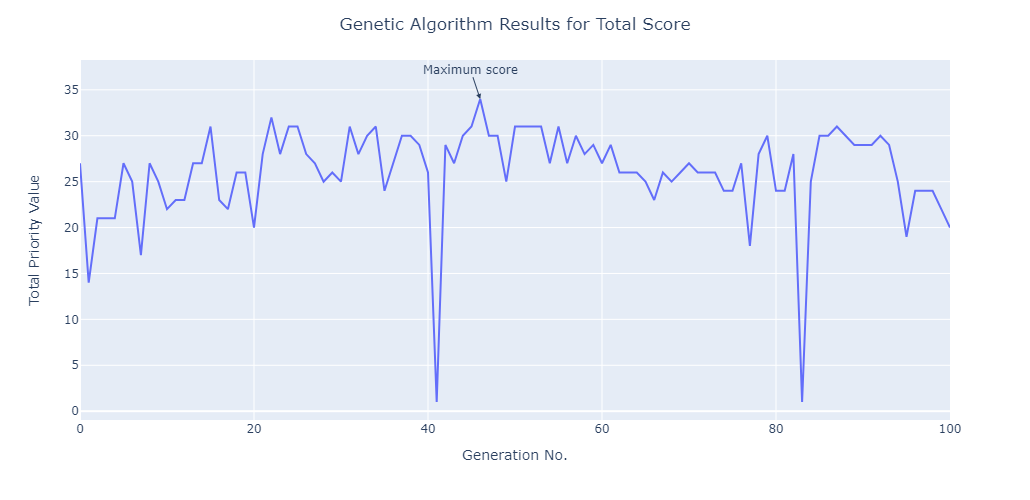

In [77]:
import plotly.express as px
figure = px.line(x = range(0,101), y = ga.list_of_solutions_score, width=1000, height=500)
figure.update_layout(title_text='Genetic Algorithm Results for Total Score', title_x=0.5)
figure.update_yaxes(title_text='Total Priority Value')
figure.update_xaxes(title_text='Generation No.')

figure.add_annotation(x=ga.best_solution.generation, y=ga.best_solution.score_evaluation,
            text="Maximum score",
            showarrow=True,
            arrowhead=2)
figure.show()

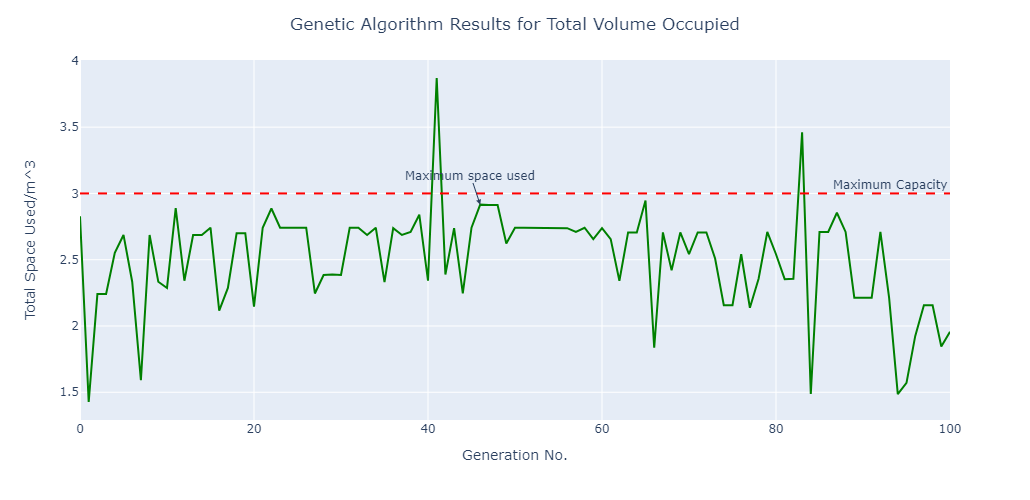

In [80]:
import plotly.express as px
figure = px.line(x = range(0,101), y = ga.list_of_solutions_space, width=1000, height=500)
figure.update_layout(title_text='Genetic Algorithm Results for Total Volume Occupied', title_x=0.5)
figure.update_yaxes(title_text='Total Space Used/m^3')
figure.update_xaxes(title_text='Generation No.')
figure.update_traces(line_color='green')
figure.add_hline(y=limit,line_dash="dash", line_color="red",annotation_text="Maximum Capacity")

figure.add_annotation(x=ga.best_solution.generation, y=ga.best_solution.used_space,
            text="Maximum space used",
            showarrow=True,
            arrowhead=2)


figure.show()

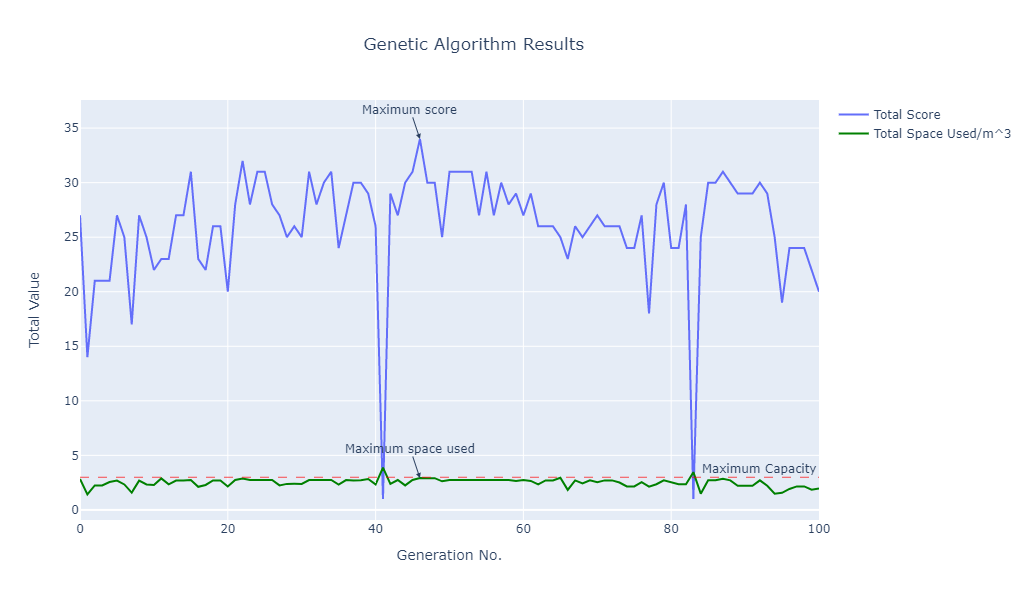

In [84]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x = list(range(0,101)), y= ga.list_of_solutions_score,
                    mode='lines',
                    name='Total Score'))
fig.add_trace(go.Scatter(x = list(range(0,101)), y=ga.list_of_solutions_space,
                    mode='lines',
                    line_color = 'green',
                    name='Total Space Used/m^3'))


fig.update_layout(
    autosize=True,
    width=1000,
    height=600,)

fig.update_layout(title_text='Genetic Algorithm Results', title_x=0.46)
fig.update_yaxes(title_text='Total Value')
fig.update_xaxes(title_text='Generation No.')
fig.add_hline(y=limit,line_dash="dash", line_color="red",annotation_text="Maximum Capacity", line_width=0.7)

fig.add_annotation(x=ga.best_solution.generation, y=ga.best_solution.used_space,
            text="Maximum space used",
            showarrow=True,
            arrowhead=2)


fig.add_annotation(x=ga.best_solution.generation, y=ga.best_solution.score_evaluation,
            text="Maximum score",
            showarrow=True,
            arrowhead=2)
              
fig.show()